
# Project: Investigating no a no show appointmnet Dataset 
#### Dataset consisting of medical appointments and show/no show status of the patients. 

The process will entail cleanign the data, carrying out various wringling and exloration activities and visualizing the dataset to investigate the diferent factors about the patients and how htey related ot their show/no show status.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset collects information about medical appoitnments in Brasil and is focused on whether patients show up for their appointments. It includes varisou attribtues about hte patients and their appointments as listed below:

### Data Disctionary
- ScheduleDay - day patients set up their appointment
- Neighbourhood - indicates location of the Hospital
- Scholarship - Indicates whether or not the patient is enrolled in Brasilain welfare program "Bolsa Familia
- No_show - indicates whether a patients showed up for their appointment (No) or whether they did not show up (yes)
- PatientId - patient identification
- AppointmentID - identification of each appointment
- Gender - male or female
- AppointmentDay - Day of the appointment
- Age - age of the patient
- Hipertension - whther patient has hipertension, yes or no
- Diabetes - whether patient has diabetes, yes or no
- Alcoholism - whether patient has alcoholism history, yes or no
- Handcap - whether patient has handicap, yes or no
- SMS_received - whether the patient received an SMS


### Questions to explore and answer
1. Does the patient's Gender affect thier no show status?
2. What propostion of patients showed up compared to those that did not?

In [28]:
# Import Libraries

import pandas as pd
import numpy as np

# % matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [29]:
# Loading dataset
df_appoint = pd.read_csv('no_show_appointments-may-2016.csv')
df_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
df_appoint.shape

(110527, 14)

In [31]:
# list the names of the differnt columns in the dataset
df_appoint.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [32]:
df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The age column has an outlier where the patient's age is listed as -1, this needs to be dropped.

In [33]:
# filtering dataset to only include viable values in age

df_appoint = df_appoint[df_appoint['Age'] != -1]

In [34]:
# Function to rename columns with "-" instead of "_" 
def rename_col(df, column_dict):
    df.rename(columns = column_dict, inplace=True)
# implimenting the function
rename_col(df_appoint, lambda x:x.replace('-', '_'))  

In [35]:
# Renaming the mispelled columns 
cols = {"Hipertension": "Hypertension", "Handcap": "Handicap"}
df_appoint.rename(columns = cols, 
                  inplace=True)


In [36]:
df_appoint.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [37]:
df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hypertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handicap        110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No_show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


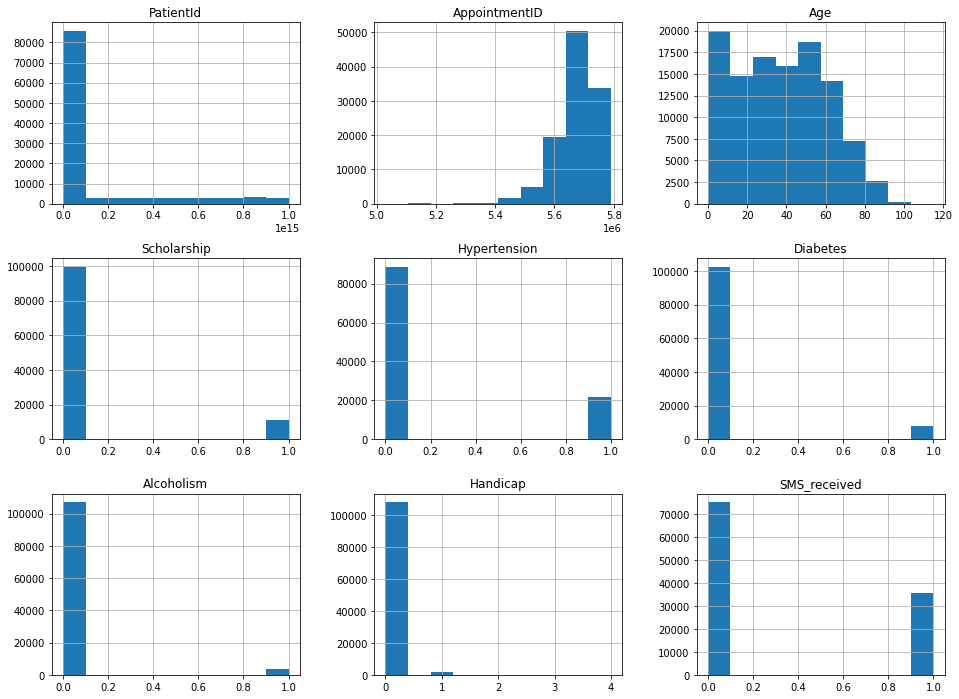

In [38]:
# histogram of the whole dataset
df_appoint.hist(figsize=(16, 12));

### Summary findings

- Most of the patients are aged between 20 and 70 years
- majority of the patients do not have Hypertension, Diabetes, Alcoholism, or Handicap
- More patients did not recieve an SMS compared ot those who received




### Data Cleaning 
In this part, I will clean the data type of differnt columns so that they are in the right format. This is a continuation since earlier, I perfomed various cleaning where they were needed immediately. these icnldue renamign some fo the columns and droppign outliers. This section considers mainly the datatypes format to esnure effective analysis

In [39]:
# checking the datatypes fo the differnt columns
df_appoint.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show            object
dtype: object

- The appointmentID and patientID need to be strings
- The ScheduleDay and AppointmentDay need to be dates

In [40]:
# converting AppointmentID and PatientID into strings
string_col = ['PatientId', 'AppointmentID']
for itm in string_col:
    df_appoint[itm] = df_appoint[itm].astype('str')

In [41]:
# converting AppointmentDay and ScheduleDay to date format

date_cols = ['ScheduledDay','AppointmentDay']
for itm in date_cols:
    df_appoint[itm] = df_appoint[itm].apply(pd.to_datetime).dt.date
    df_appoint[itm] = df_appoint[itm].apply(pd.to_datetime)

In [42]:
# checkign whether our columns dtypes have been changed
df_appoint.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                   object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### A few exploratory graphs on the numerical columns

### Comparing ' No_Show status for  handicap patients

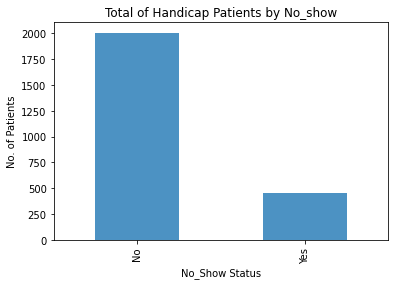

In [59]:
df_appoint.groupby(['No_show'])['Handicap'].sum().plot(
    kind='bar', 
    title='Total of Handicap Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


- A majority of the handicap patients showed for thier appointment, about 2000 of them while 500 did not keep their appointment.

### Comparing ' No_Show status for insured/Scholarship patients

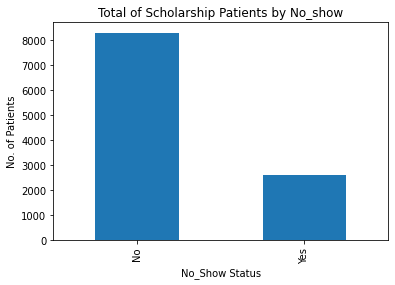

In [60]:
df_appoint.groupby(['No_show'])['Scholarship'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show');
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


- Slightly about 8000 patients who are on scholarship showed up for thier appointment while less than 3000 patients on scholarship failed to keep their appointments.

### Comparing ' No_Show status for  Hypertension patients

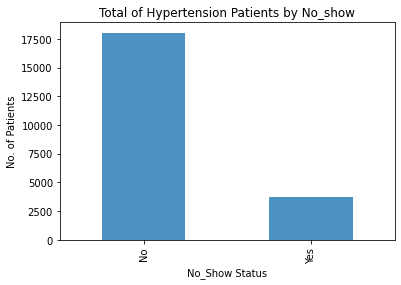

In [57]:
df_appoint.groupby(['No_show'])['Hypertension'].sum().plot(
    kind='bar', 
    title='Total of Hypertension Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


- Above 17500 patients who have hypertension kept their appointment while less than 5000 who had hypertension showed up for their appointment

### Comparing ' No_Show status for  Diabetes patients

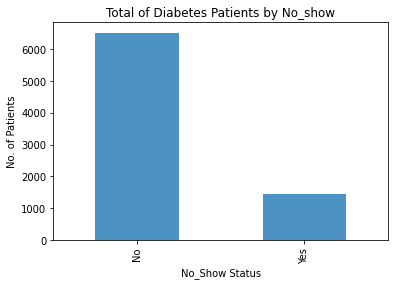

In [58]:
df_appoint.groupby(['No_show'])['Diabetes'].sum().plot(
    kind='bar', 
    title='Total of Diabetes Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


- more than 6000 patients which is a majority of the Diabetes patients showed up for their appitment while less than 2000 of them did nto show up.

### Comparing ' No_Show status for  Alcoholic patients

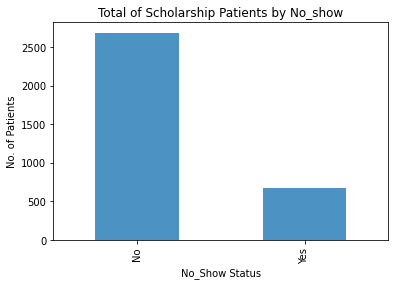

In [48]:
df_appoint.groupby(['No_show'])['Alcoholism'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


- A majority of the Alcoholic patients, over 2500 kept thier appointments while less than 1000 did nto show up for the appointment

### Research Question 1  -Does the patient's Gender affect thier no show status?

In [49]:
df_appoint.groupby('Gender')['No_show'].value_counts().unstack()

No_show,No,Yes
Gender,,
F,57245,14594
M,30962,7725


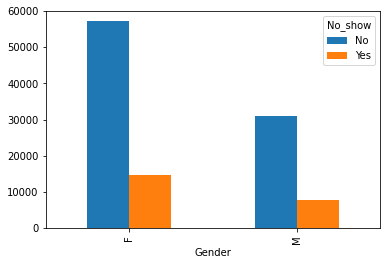

In [50]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
gender_noshow = df_appoint.groupby('Gender')['No_show'].value_counts().unstack()
gender_noshow.plot(kind='bar');

### Research Question 2  -What propostion of patients who received or did not receive SMS showed up compared to those that did not?

In [52]:
#filtering data to show No_Shows based on Yes or No
No_shows = df_appoint.No_show.value_counts()
No_shows

No     88207
Yes    22319
Name: No_show, dtype: int64

In [53]:
df_appoint.groupby(['No_show'])['SMS_received'].value_counts().unstack()

SMS_received,0,1
No_show,,
No,62509,25698
Yes,12535,9784


In [54]:
df_appoint.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

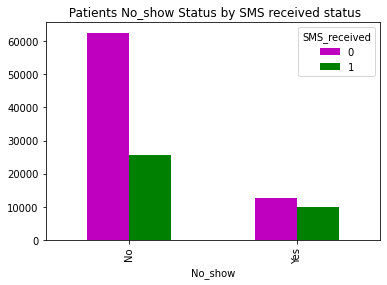

In [55]:
# filter data, group it and plot a chart based on teh groups created. 
SMS = df_appoint.groupby(['No_show'])['SMS_received'].value_counts().unstack()
SMS.plot(kind='bar', color=['m', 'g'], 
         title = " Patients No_show Status by SMS received status");

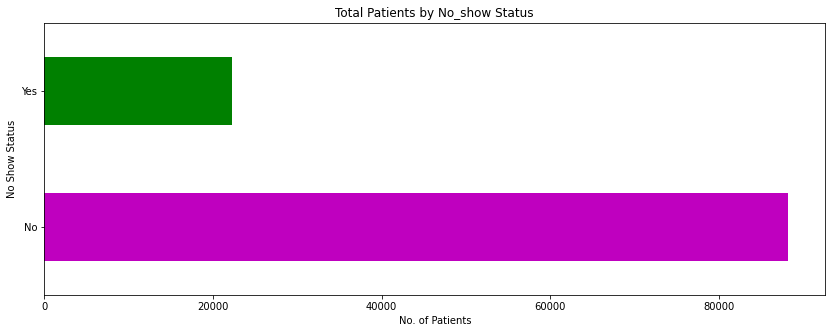

In [56]:
No_shows.plot(kind='barh',title='Total Patients by No_show Status',color=['m', 'g'], figsize=(14, 5));
plt.xlabel("No. of Patients");
plt.ylabel("No Show Status");

<a id='conclusions'></a>
## Conclusions


### summary findings
- There were 22,319 patients who booked an appointment but did not show compared to 88,207 who showed up. 
- A total of 75,044 patients did nto receive SMS notification while 35, 482 received an SMS.
- 62509 patients did not receive an SMS but showed for the appointment while 25698 receive an SMS and dshowed up for the appointment.
- 12535 patients did not receive an sms and did not show up for the appoitnment and 9784 patients received an SMS but did not show up for the appointment. 
- 57245 females showed up for their appointments while 14594 did not.
- 30962 Male patients showed up for their appointments while 7725 did not.
- There are more female patients who showed up for their appointments than men.
- Patients with known conditions, Alcoholism, Diabetes, Hypertension and Handicap showed for their appointments in a majority with only a few not keepign their appointments

### Limitations:
- The hospital promixity to the patients is not calculable which makes it hard to determine how it exactly limits the patients abilty to show up for their apppoitmnets.

#### Sources
- https://www.kaggle.com/datasets/joniarroba/noshowappointments